<a href="https://colab.research.google.com/github/andresanchetta/bootcamp_stacks/blob/main/BOOTCAMP_DE_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Importando as bibliotecas necessárias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [3]:
url = 'https://raw.githubusercontent.com/andresanchetta/bootcamp_stacks/main/dataset.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,cidade,estado,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio
0,São Paulo,SP,70,2,1,1,7,1,1,3300,2065,211,42
1,São Paulo,SP,320,4,4,0,20,1,0,4960,1200,1750,63
2,Porto Alegre,RS,80,1,1,1,6,1,0,2800,1000,0,41
3,Porto Alegre,RS,51,2,1,0,2,1,0,1112,270,22,17
4,São Paulo,SP,25,1,1,0,1,0,0,800,0,25,11


Exibindo as informações da base de dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


Análise Estatística Básica.

In [6]:
data.describe()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,5.298167,0.777778,0.243734,3896.247194,1.174022e+03,366.704358,53.300879
std,537.016942,1.171266,1.407198,1.589521,5.888747,0.415759,0.429354,3408.545518,1.559231e+04,3107.832321,47.768031
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,450.000000,0.000000e+00,0.000000,3.000000
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1530.000000,1.700000e+02,38.000000,21.000000
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2661.000000,5.600000e+02,125.000000,36.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,5000.000000,1.237500e+03,375.000000,68.000000
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,45000.000000,1.117000e+06,313700.000000,677.000000


Verificando a correlação dos atributos

<AxesSubplot:>

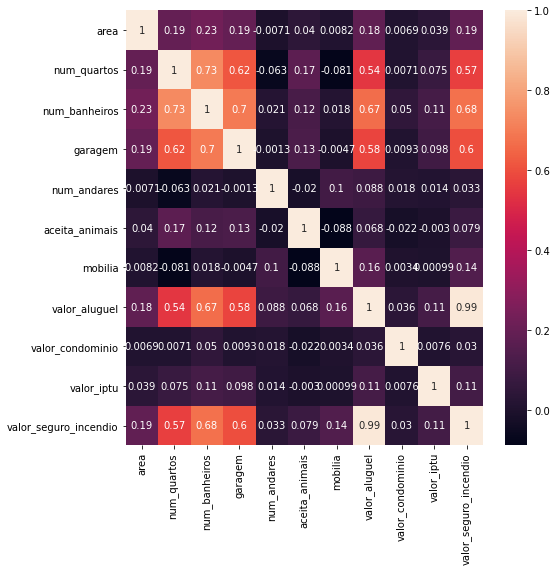

In [7]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

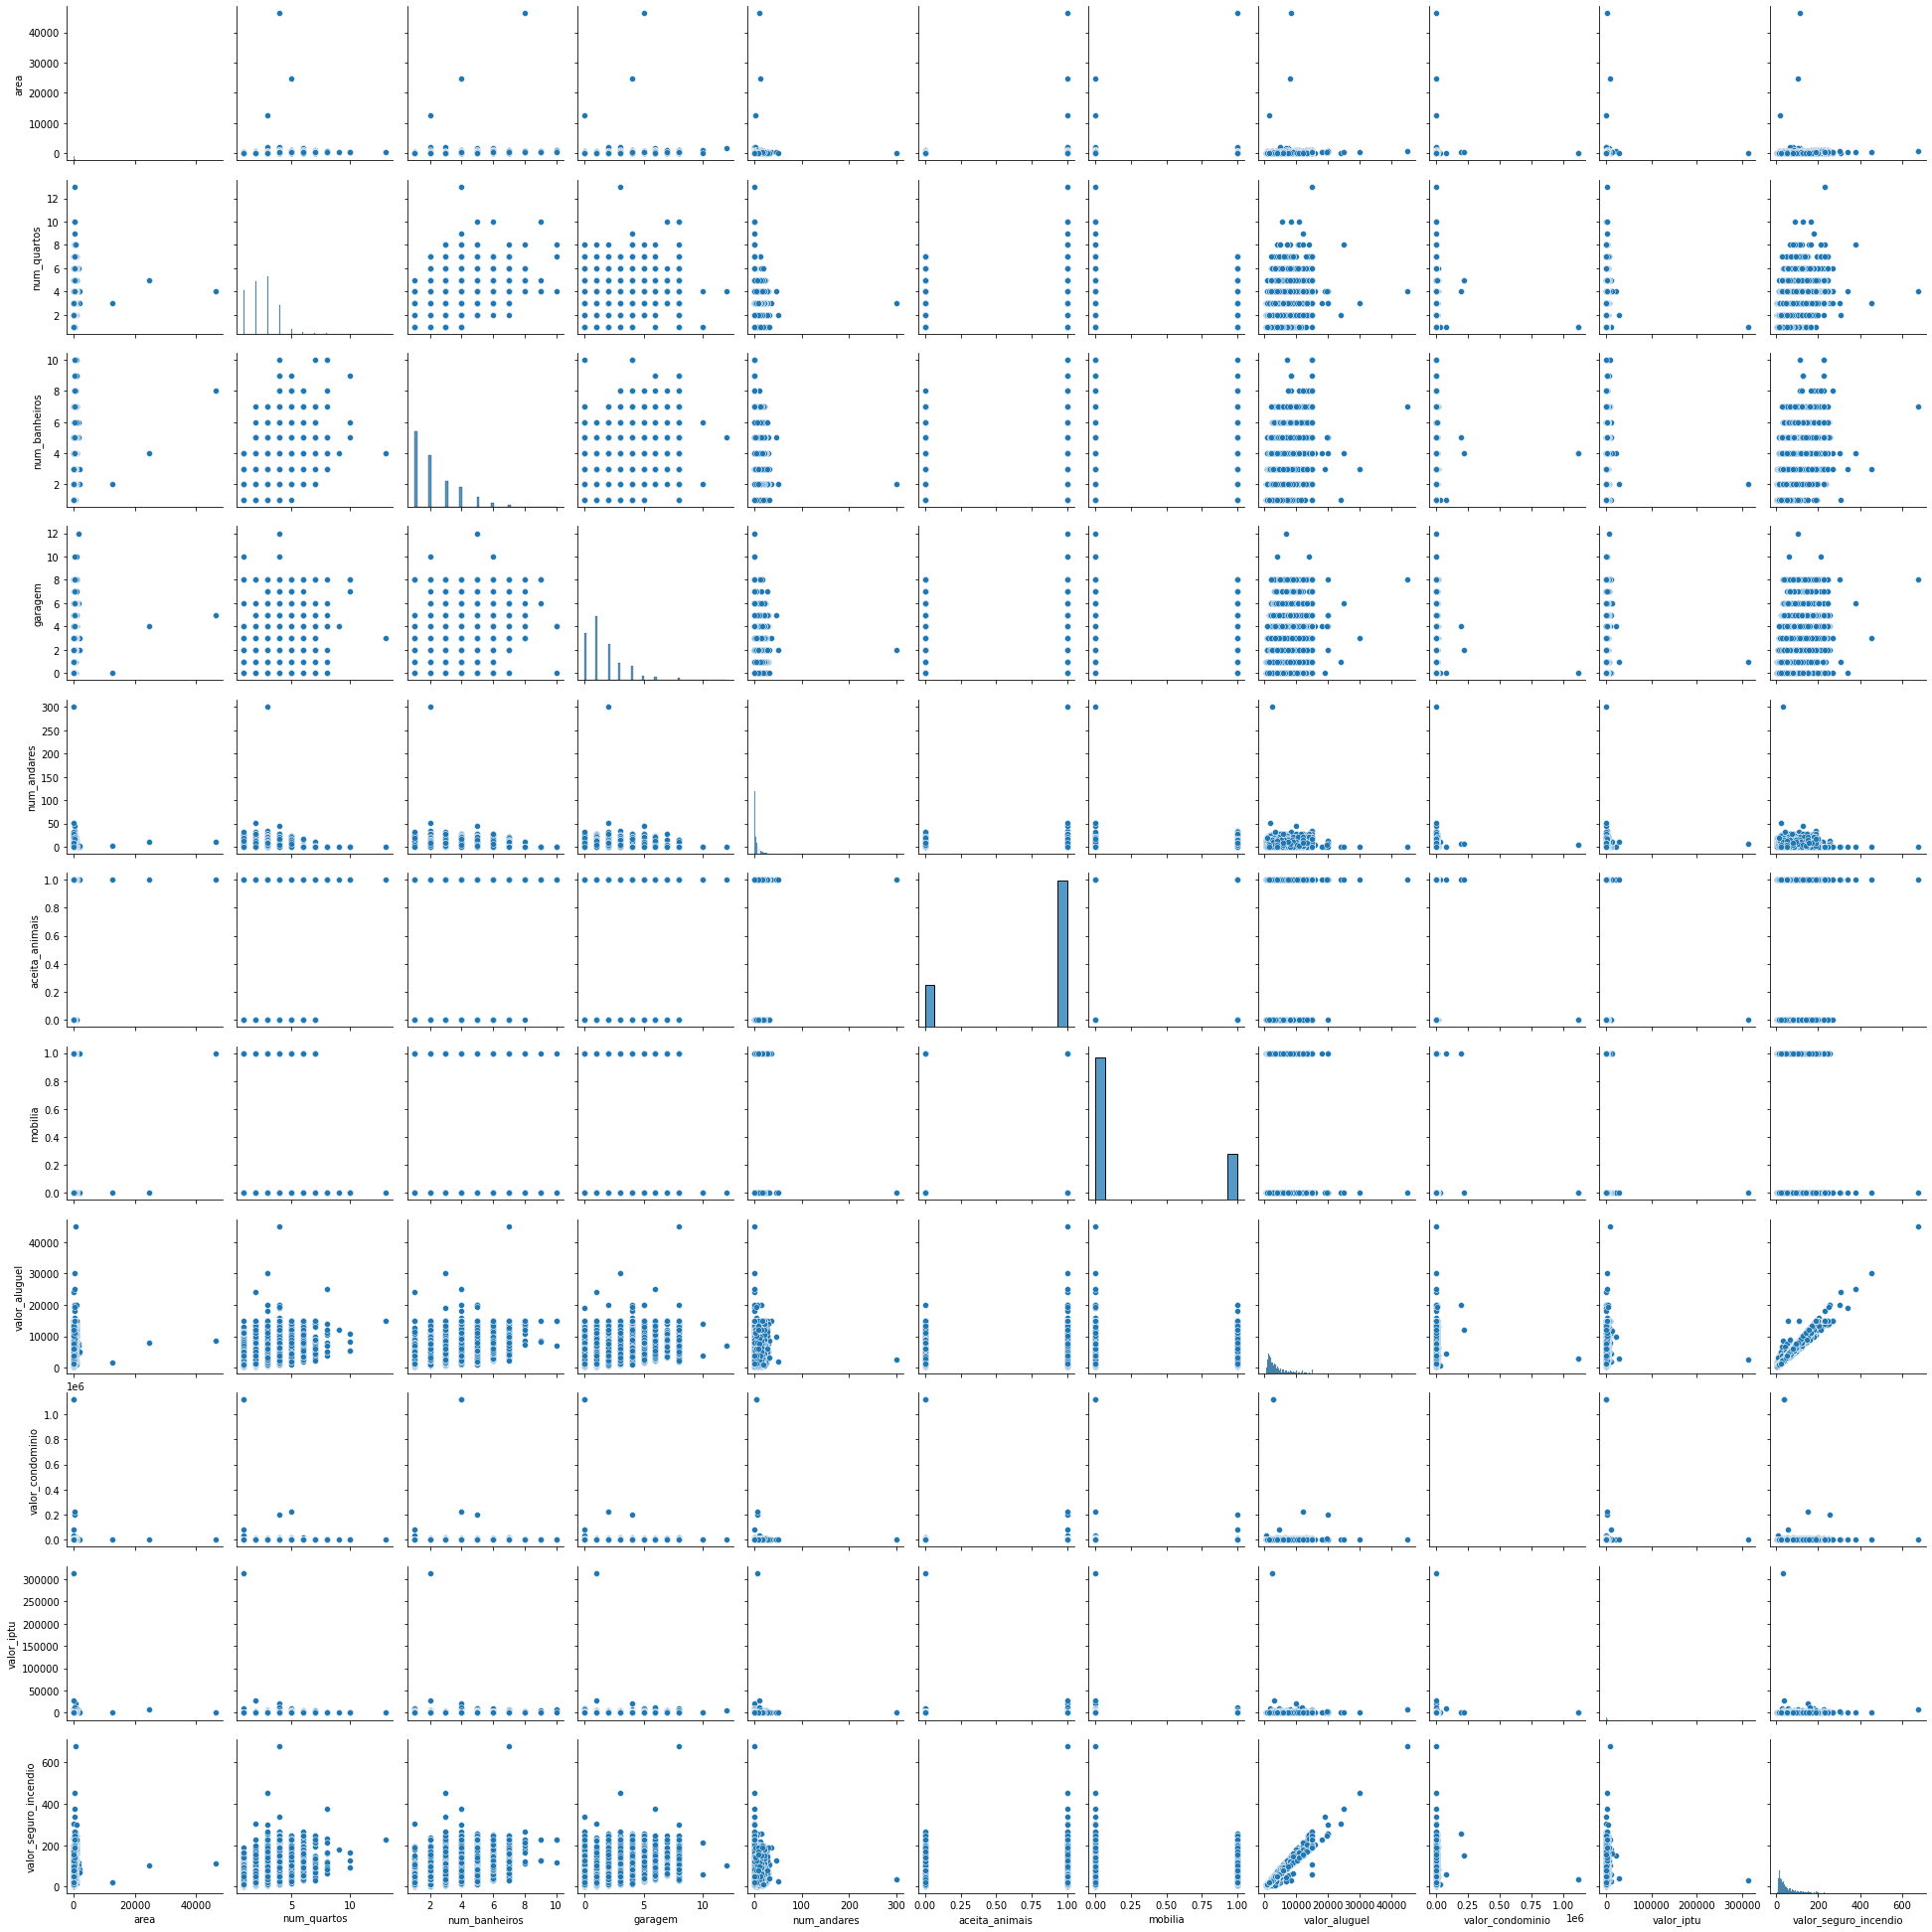

In [8]:
sns.pairplot(data)

In [9]:
!pip install sweetviz

In [10]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



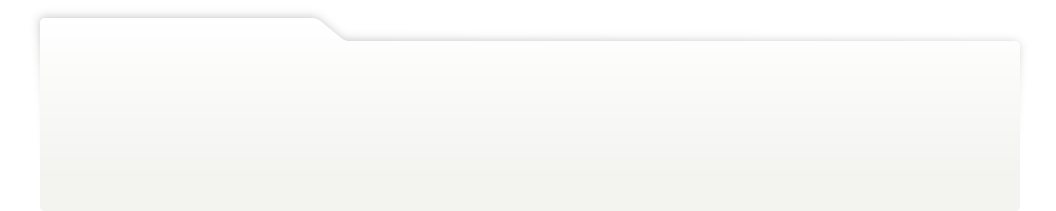
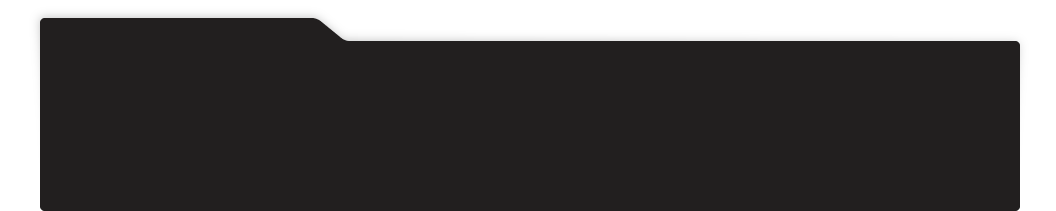
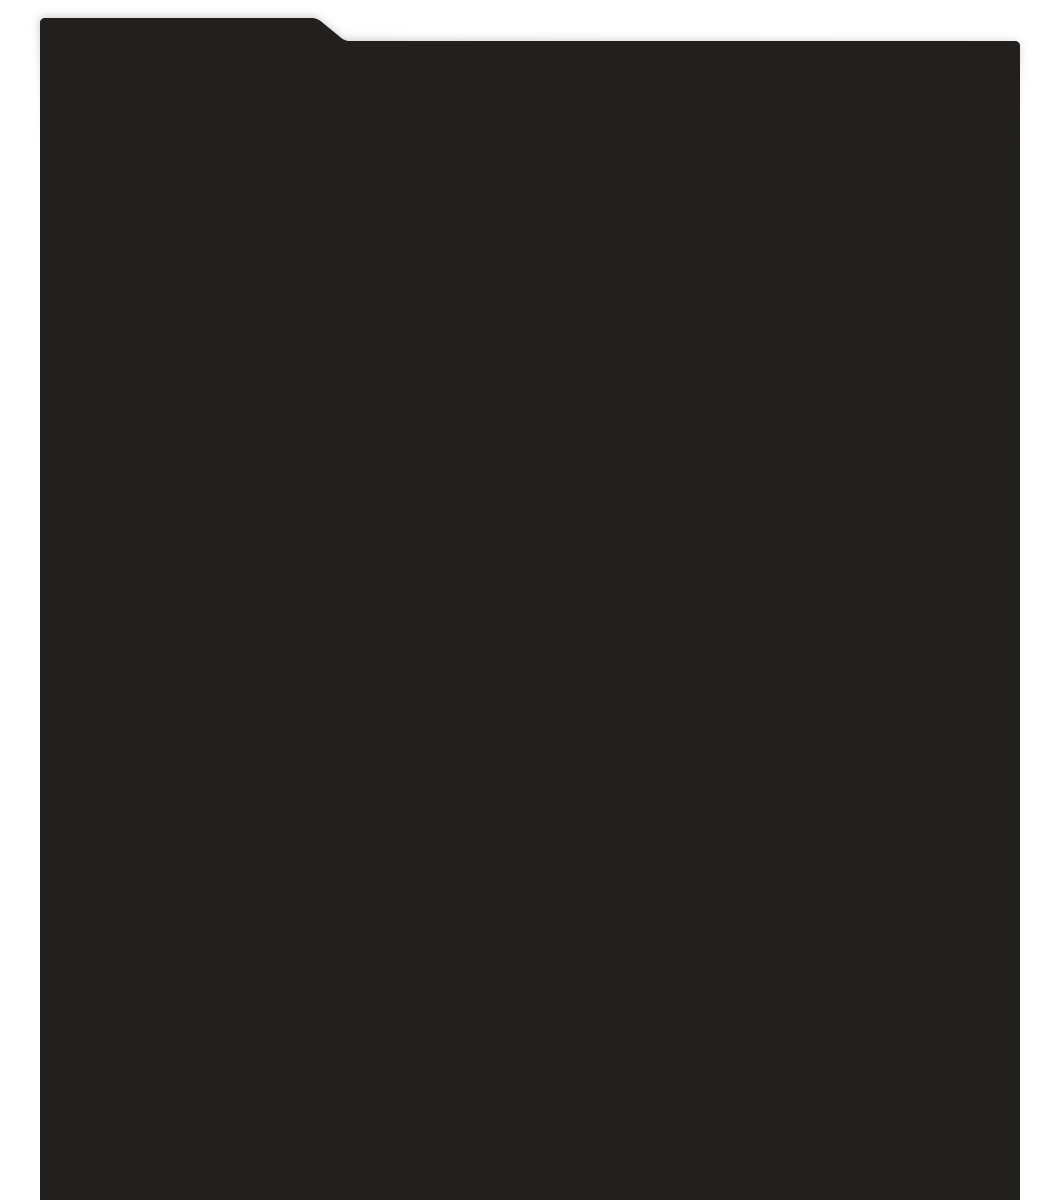
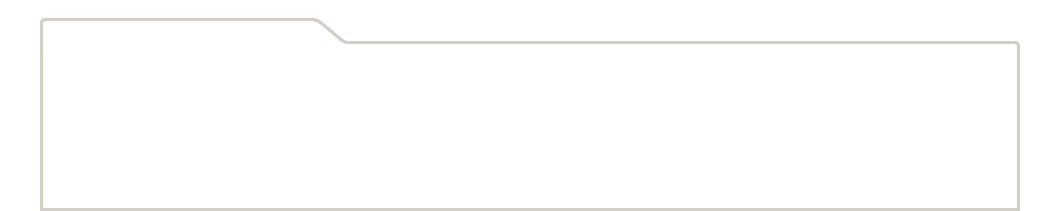
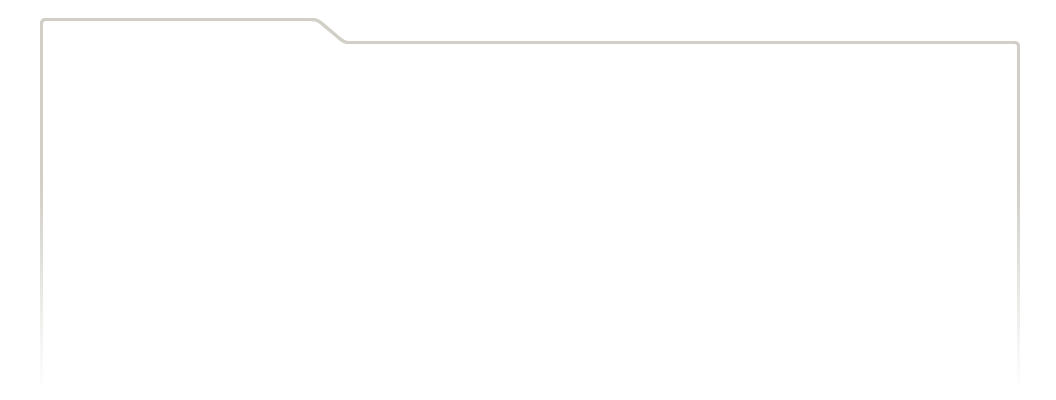
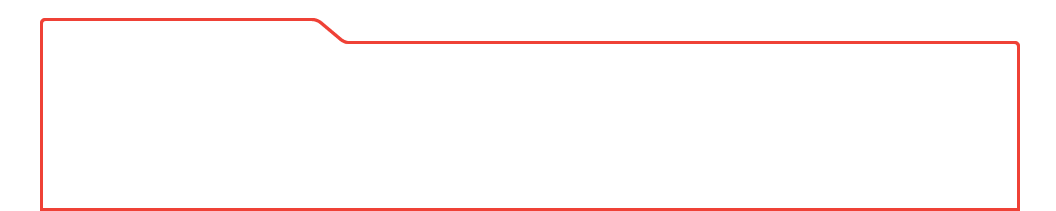
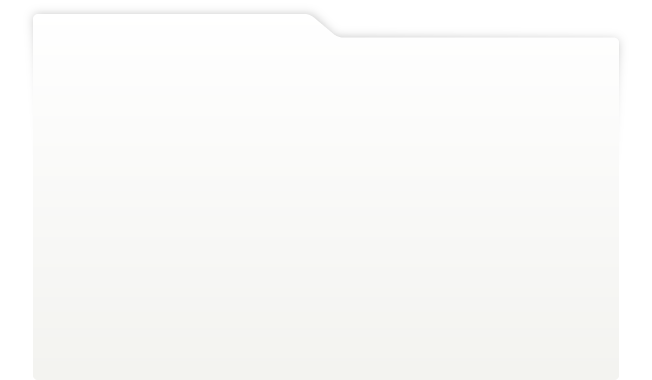
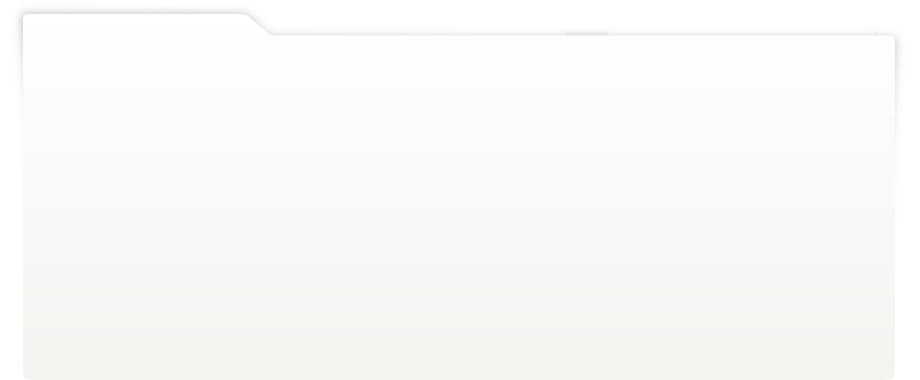
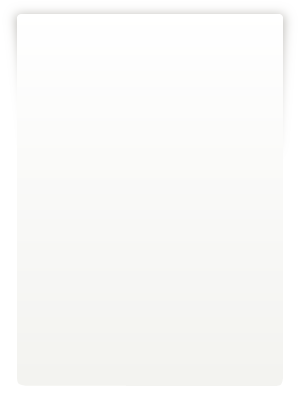
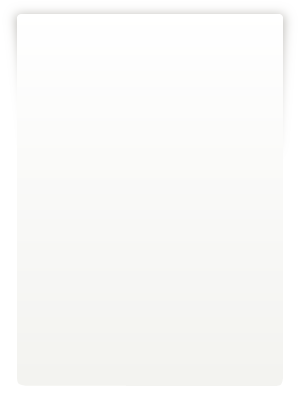
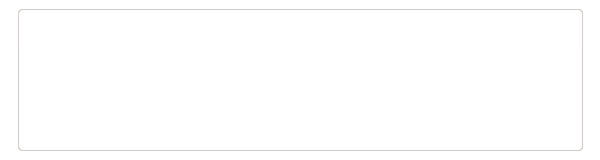
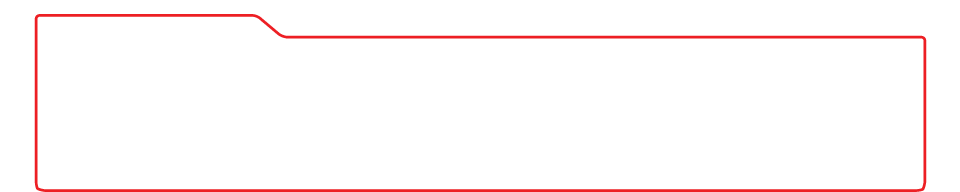
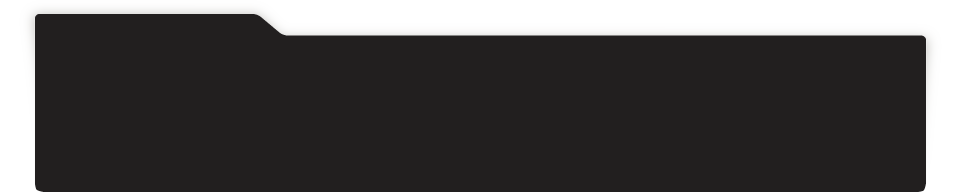
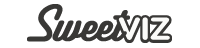
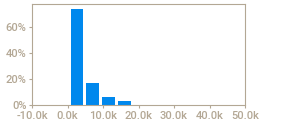
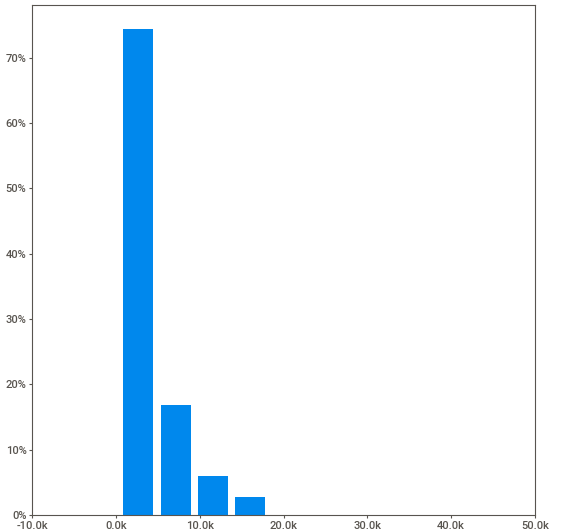
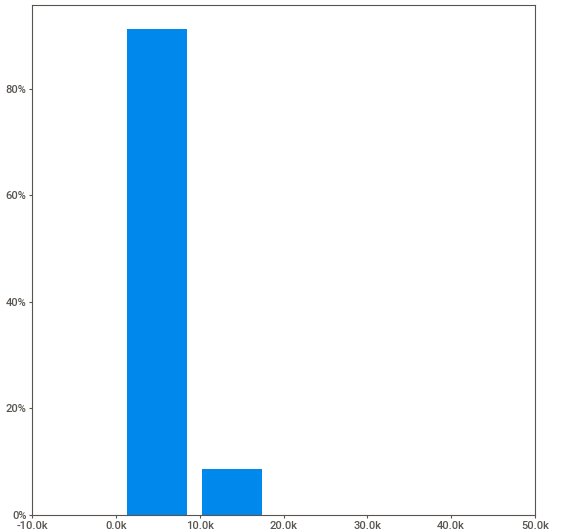
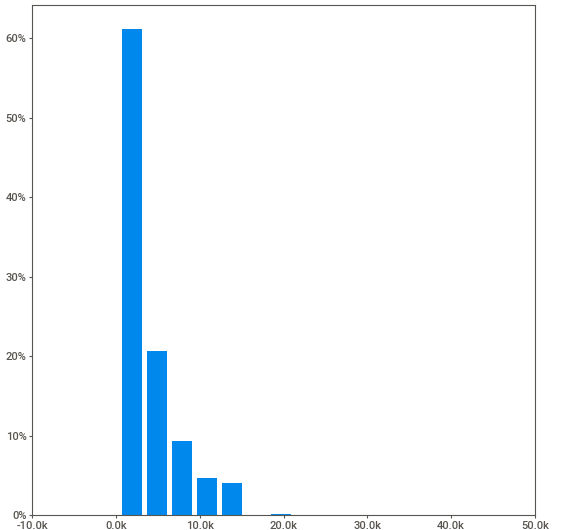
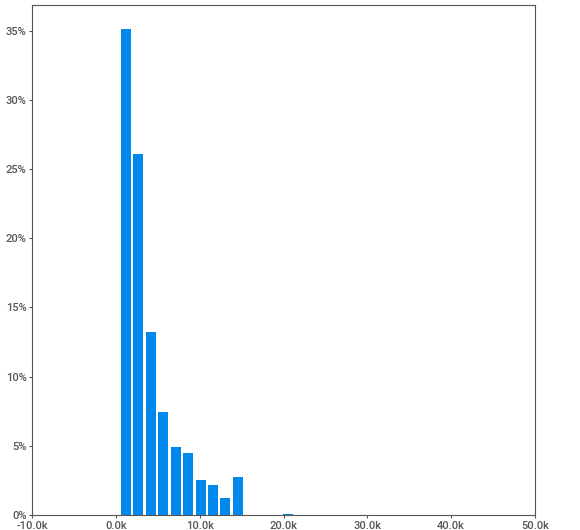
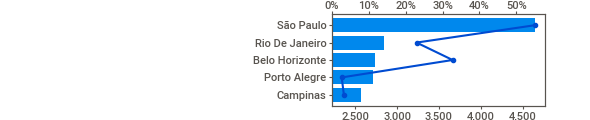
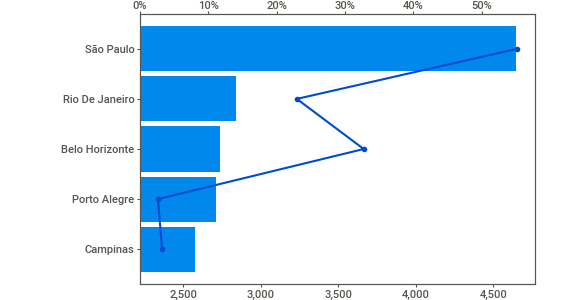
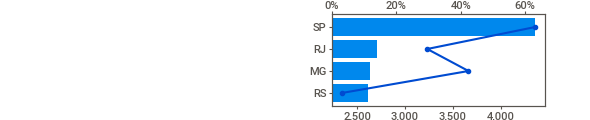
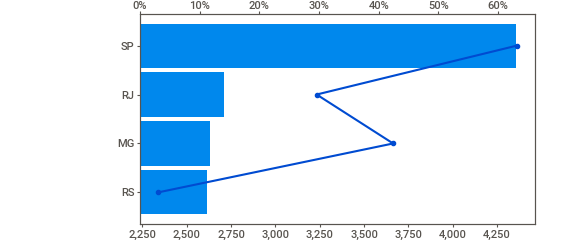
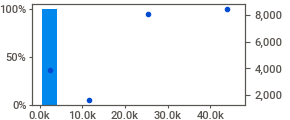
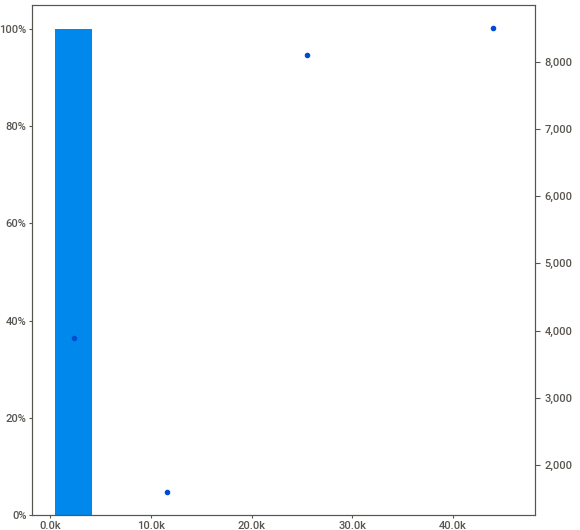
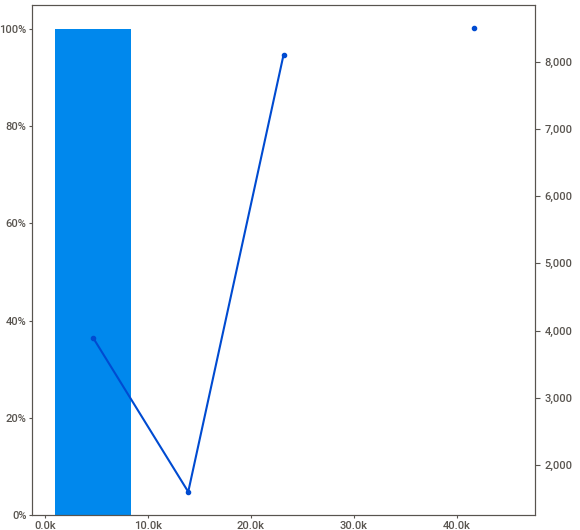
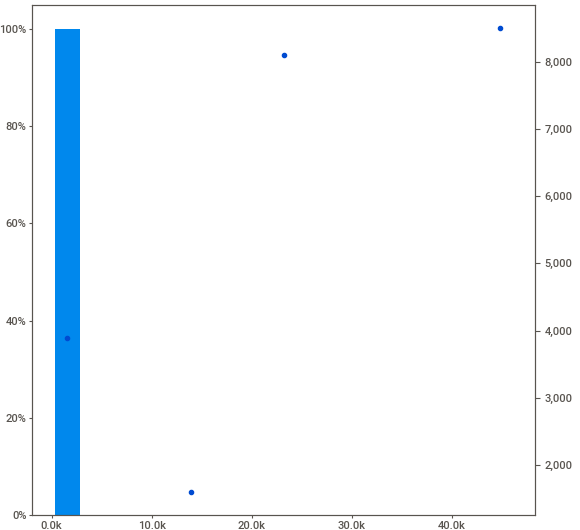
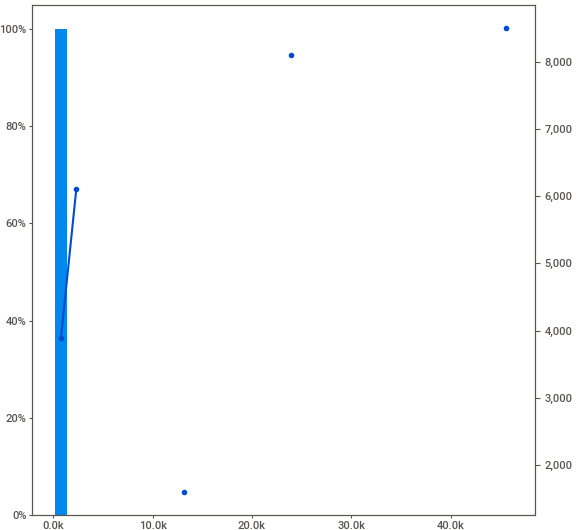
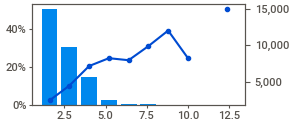
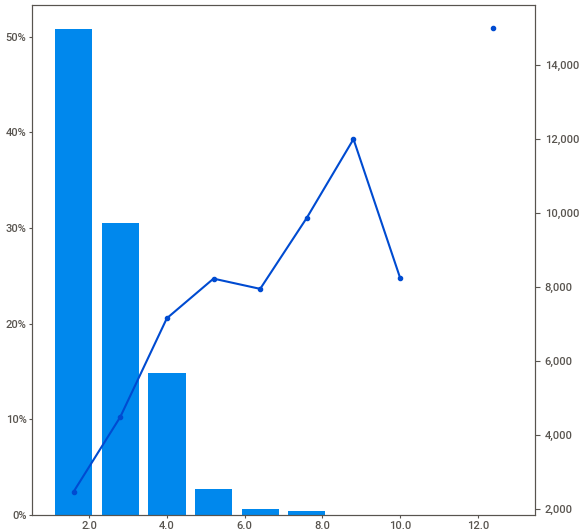
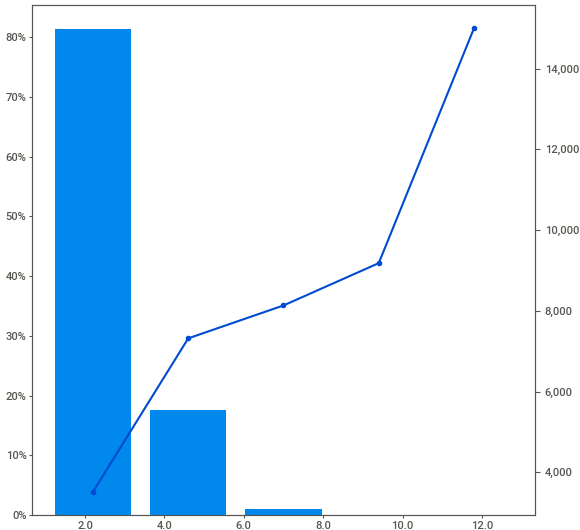
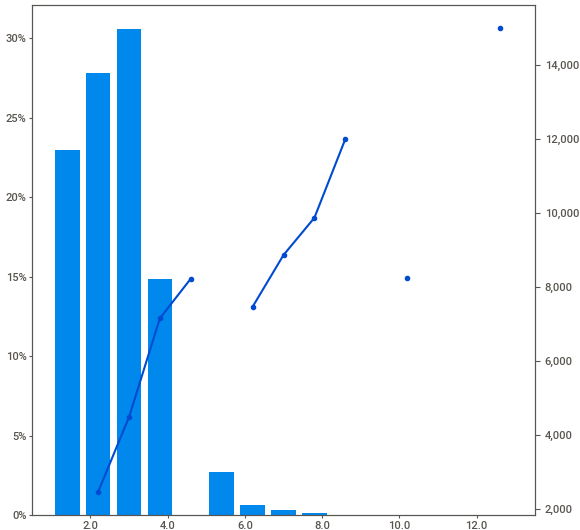
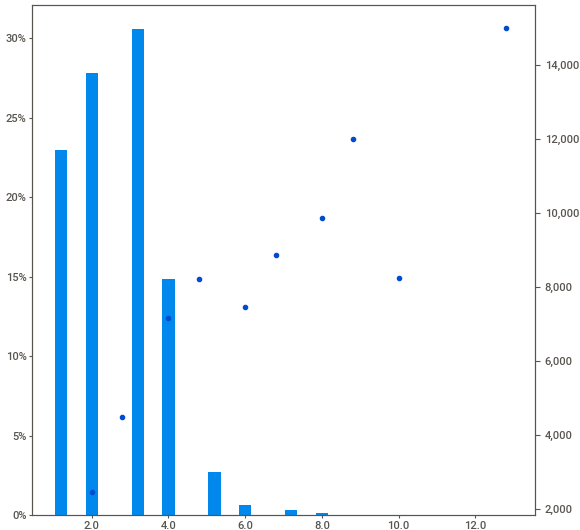
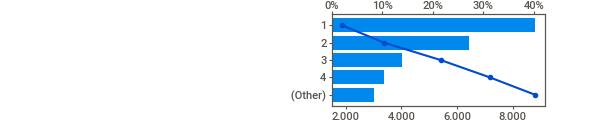
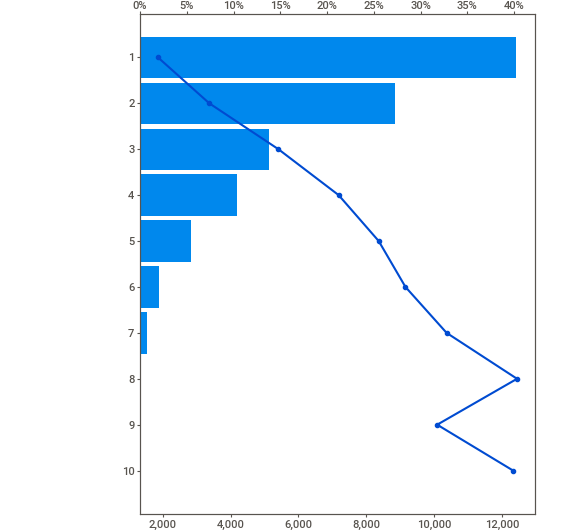
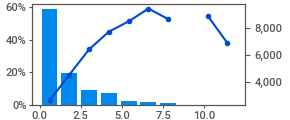
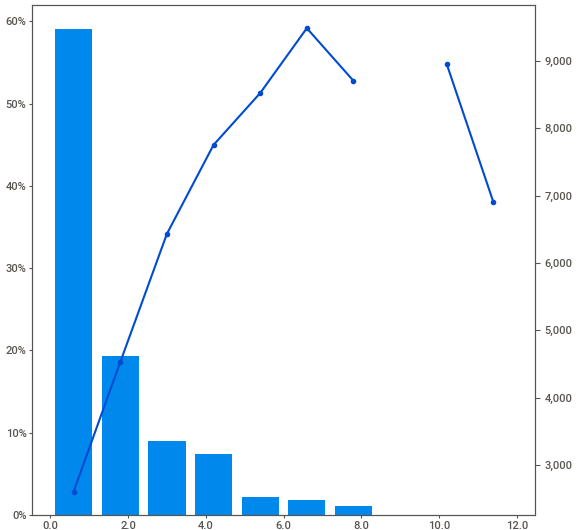
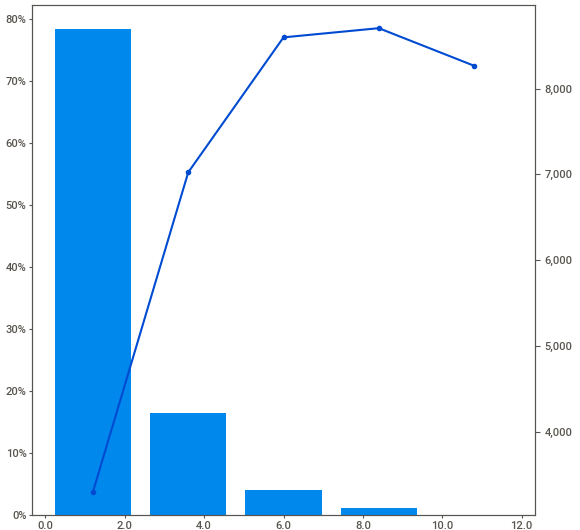
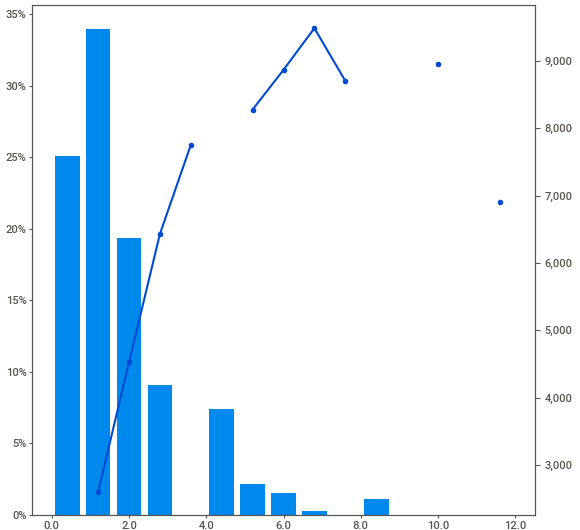
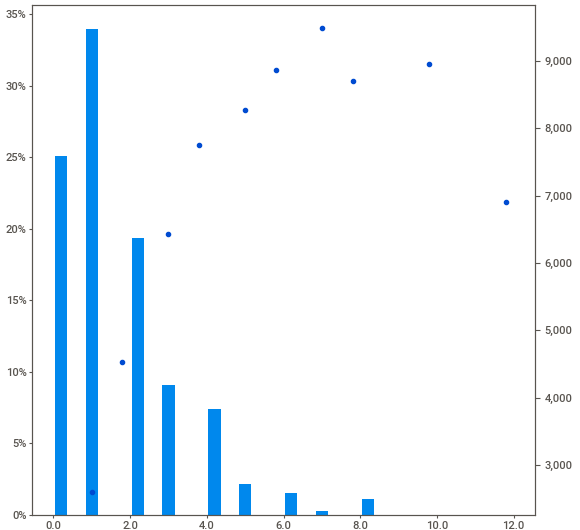
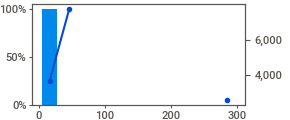
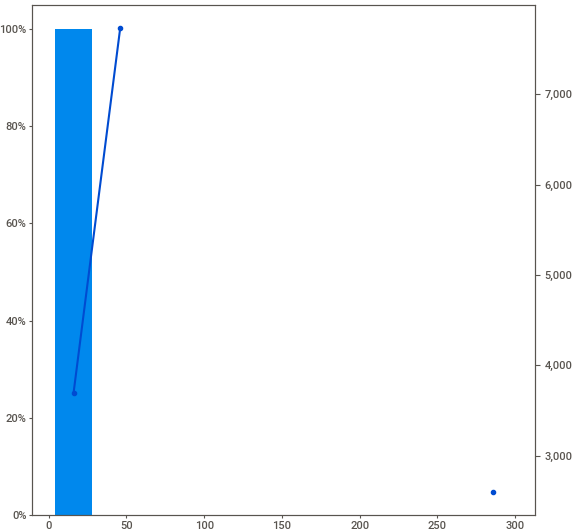
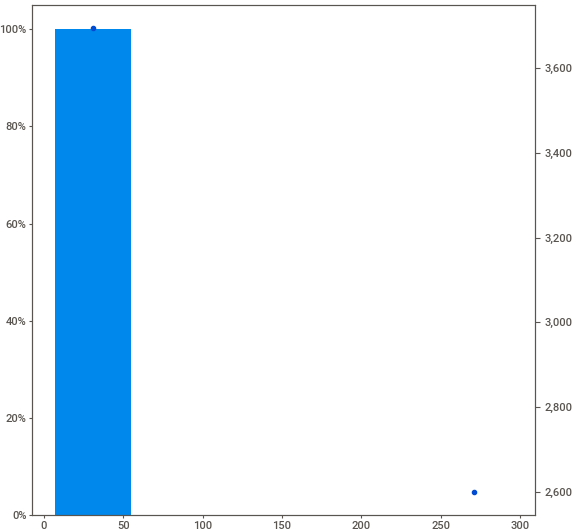
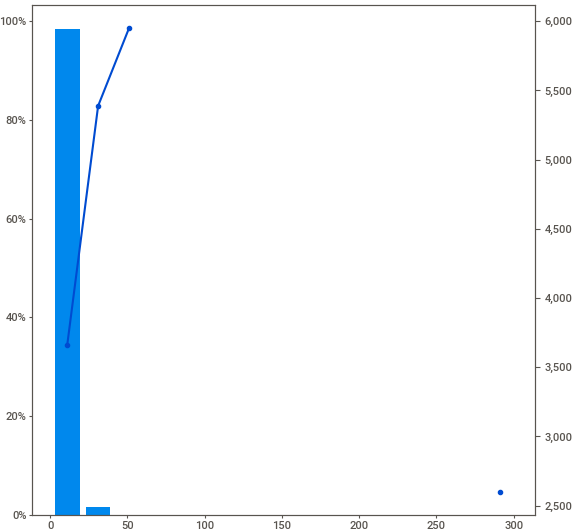
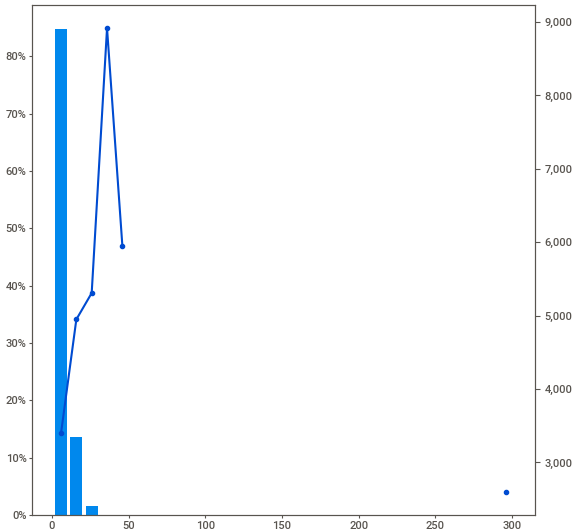
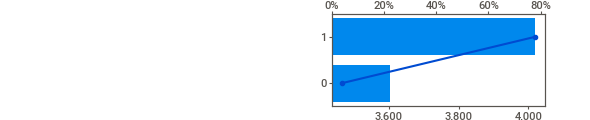
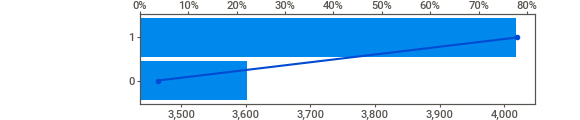
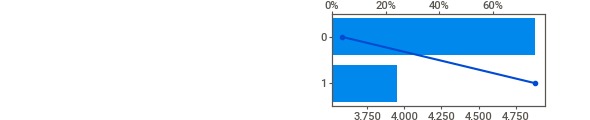
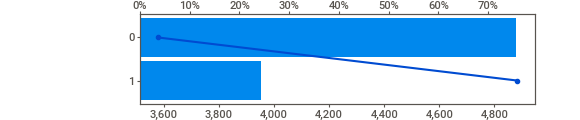
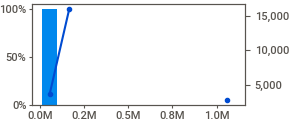
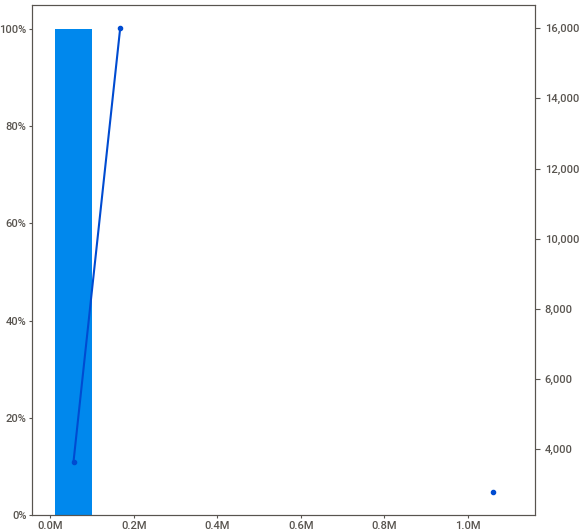
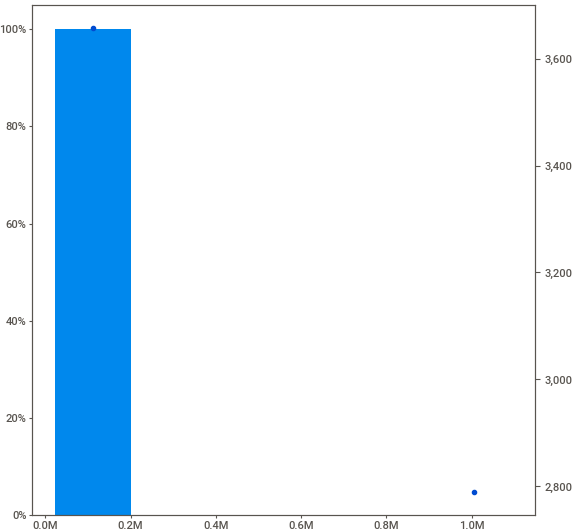
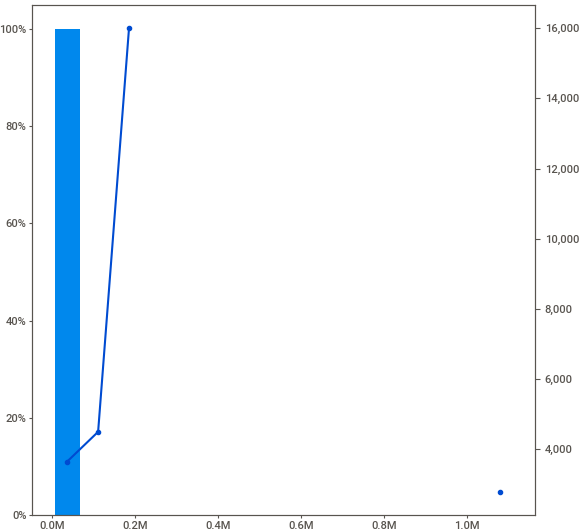
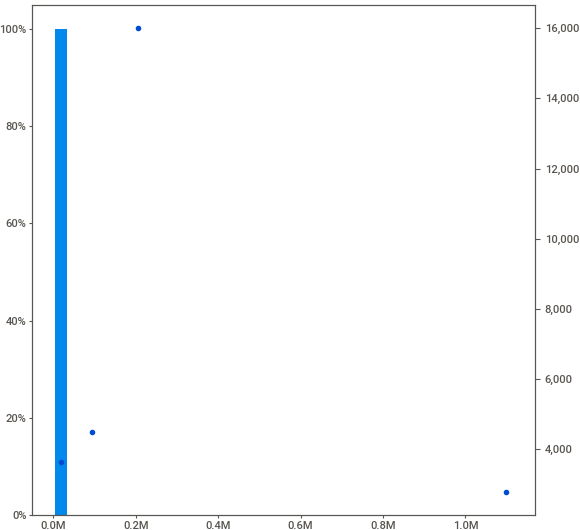
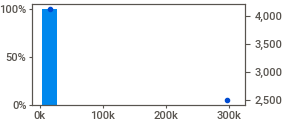
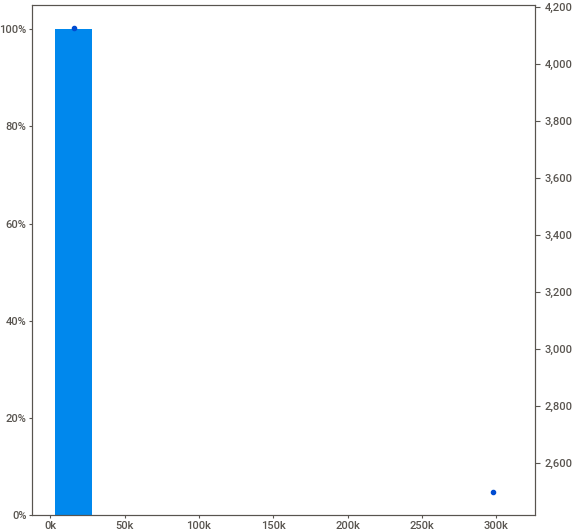
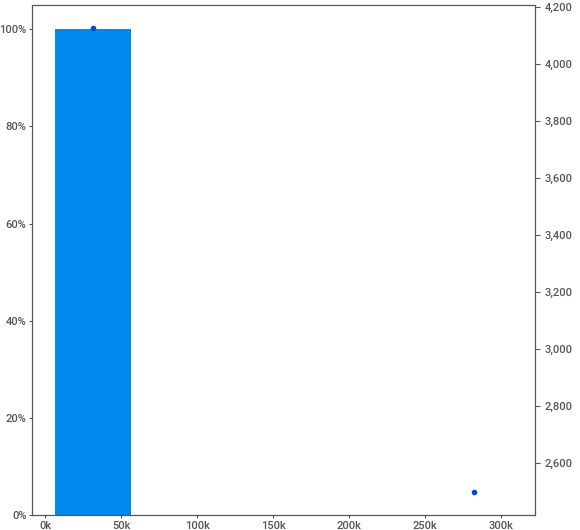
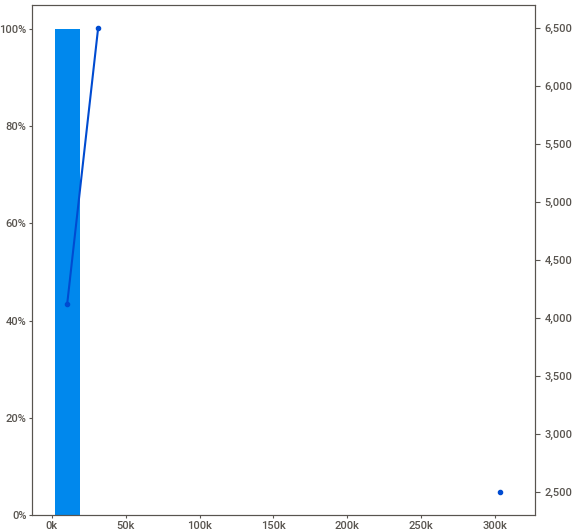
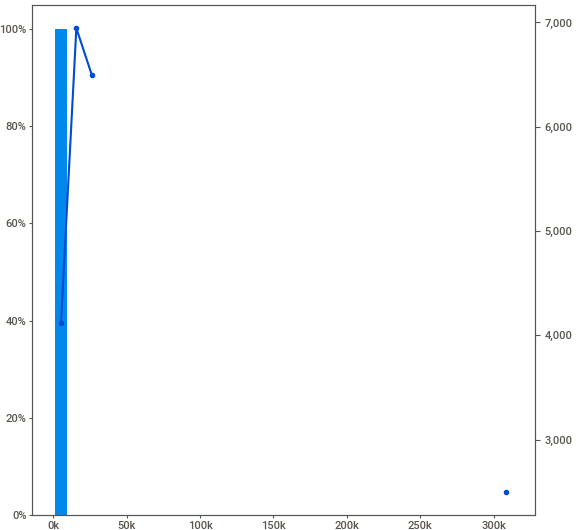
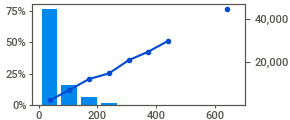
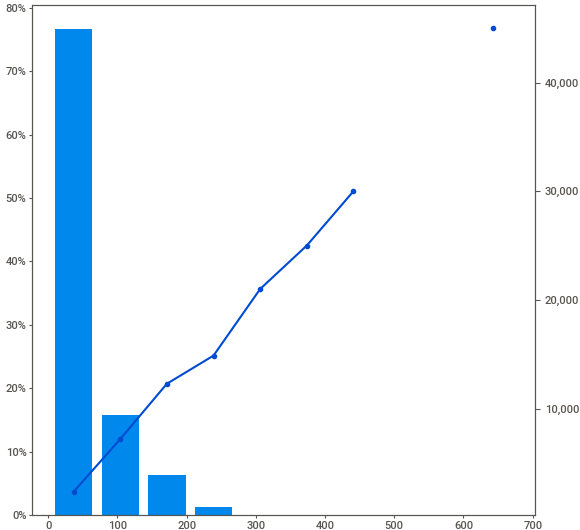
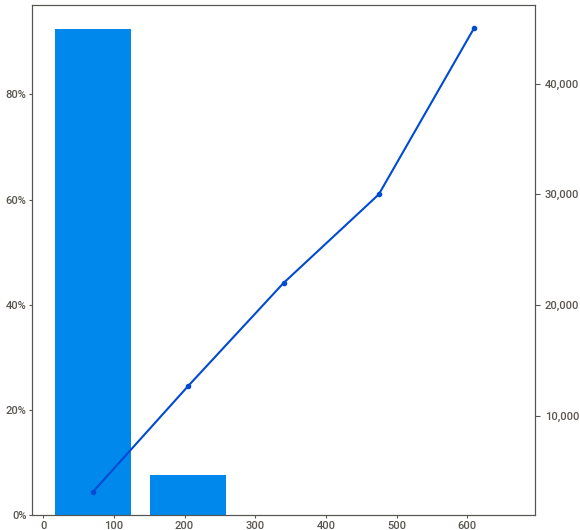
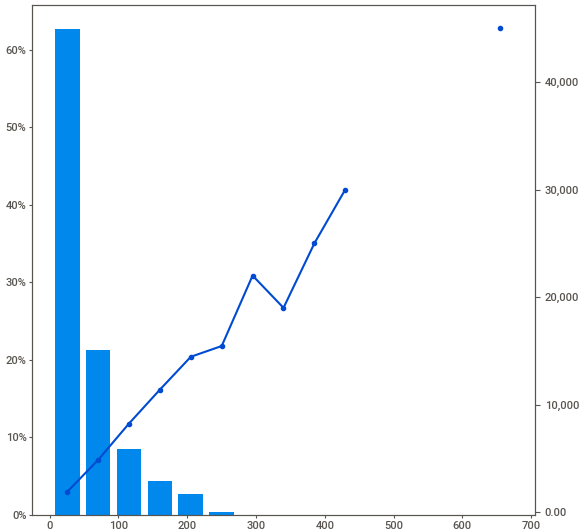
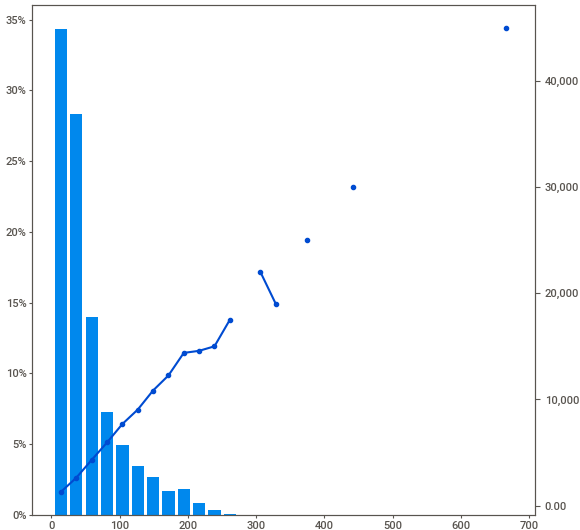
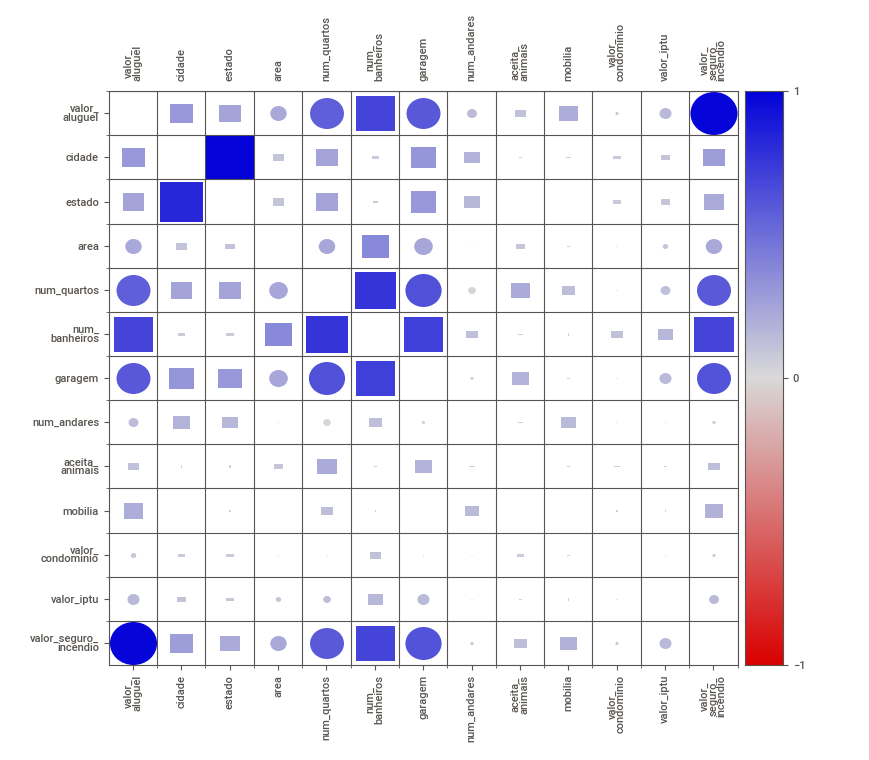
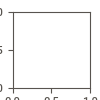

In [11]:
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

Intalando o plotly para visualizações dinamicas

In [12]:
!pip3 install plotly

In [13]:
import plotly.express as px
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()

In [14]:
import plotly.express as px
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

<AxesSubplot:xlabel='valor_aluguel'>

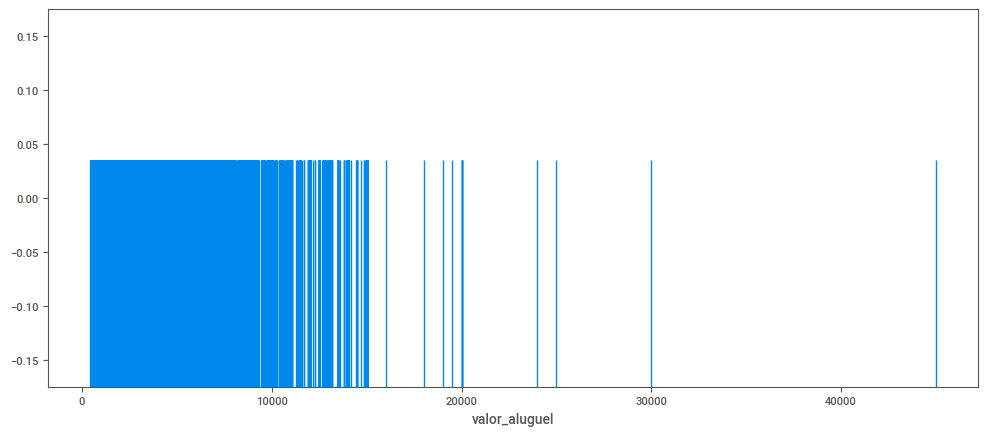

In [15]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

In [16]:
#Devido a problemas no Seaborn com "FloatingPointError: underflow encountered in exp"
np.seterr(under='ignore')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

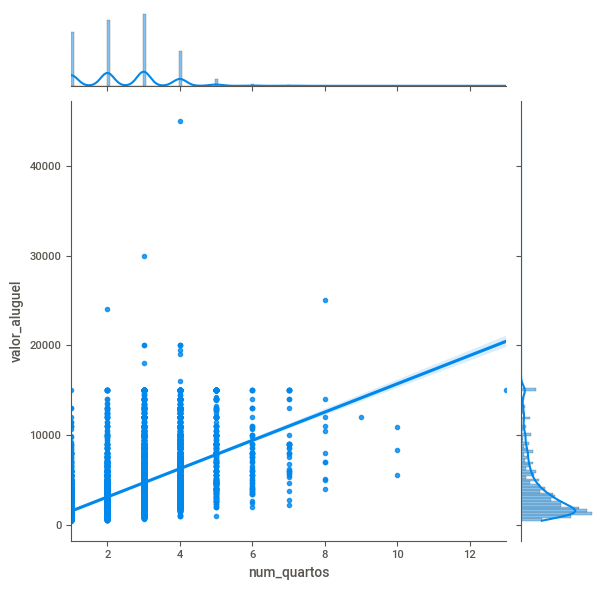

In [17]:
sns.jointplot(x = data['num_quartos'], y= data['valor_aluguel'], kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

<AxesSubplot:xlabel='aceita_animais', ylabel='count'>

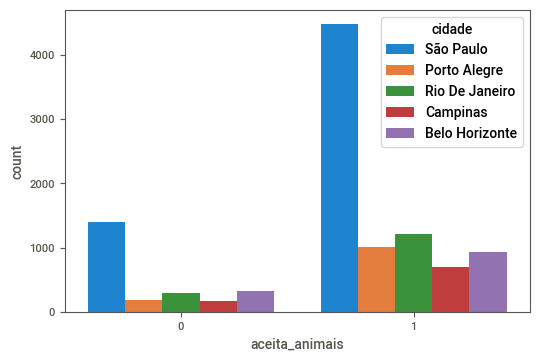

In [18]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [19]:
data.head()

,cidade,estado,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio
0,São Paulo,SP,70,2,1,1,7,1,1,3300,2065,211,42
1,São Paulo,SP,320,4,4,0,20,1,0,4960,1200,1750,63
2,Porto Alegre,RS,80,1,1,1,6,1,0,2800,1000,0,41
3,Porto Alegre,RS,51,2,1,0,2,1,0,1112,270,22,17
4,São Paulo,SP,25,1,1,0,1,0,0,800,0,25,11


* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [20]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='animal_categorical'>

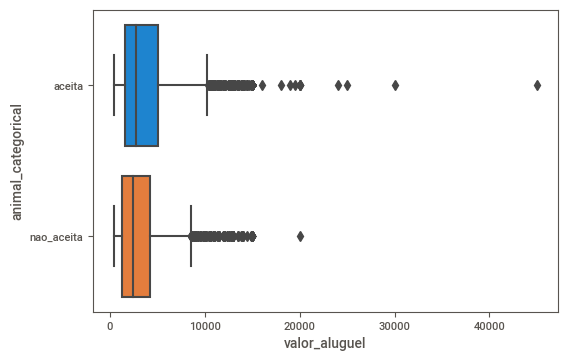

In [21]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [22]:
pd.DataFrame(data['cidade'].unique())

,0
0,São Paulo
1,Porto Alegre
2,Rio De Janeiro
3,Campinas
4,Belo Horizonte


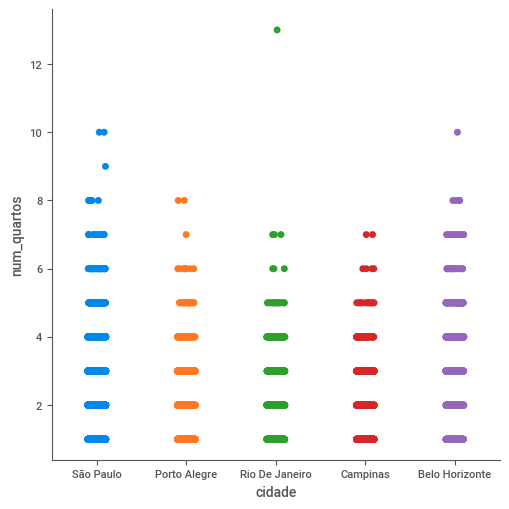

In [23]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade com o maior número de quartos.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='num_banheiros', ylabel='count'>

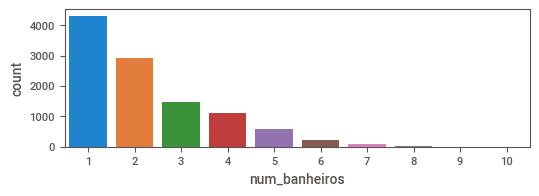

In [24]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

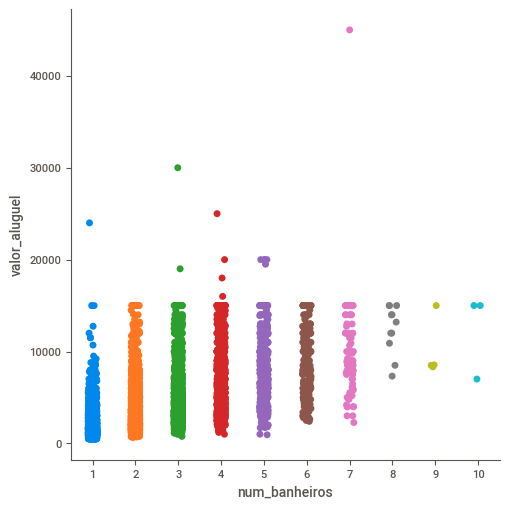

In [25]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [26]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='mobilia_categorical'>

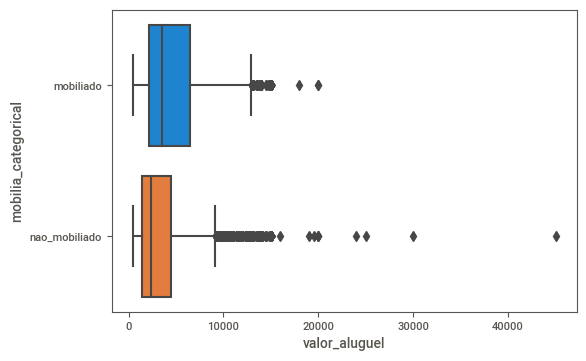

In [27]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

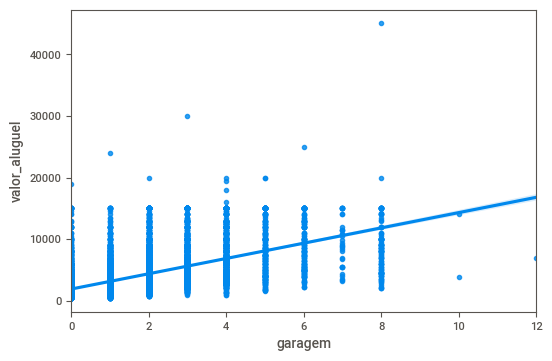

In [28]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

<Figure size 600x400 with 0 Axes>

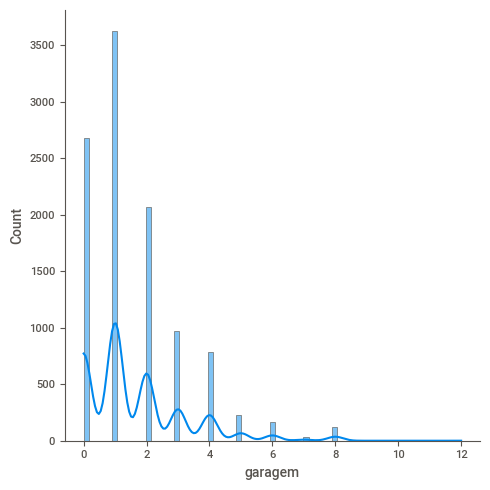

In [29]:
plt.figure(figsize =(6,4))
sns.displot(x = data['garagem'], kde = True)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

<AxesSubplot:xlabel='cidade', ylabel='valor_seguro_incendio'>

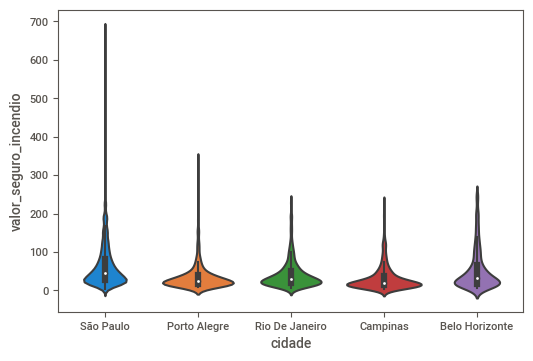

In [30]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data)

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

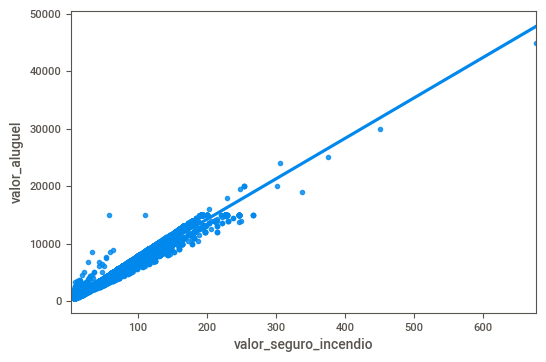

In [31]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

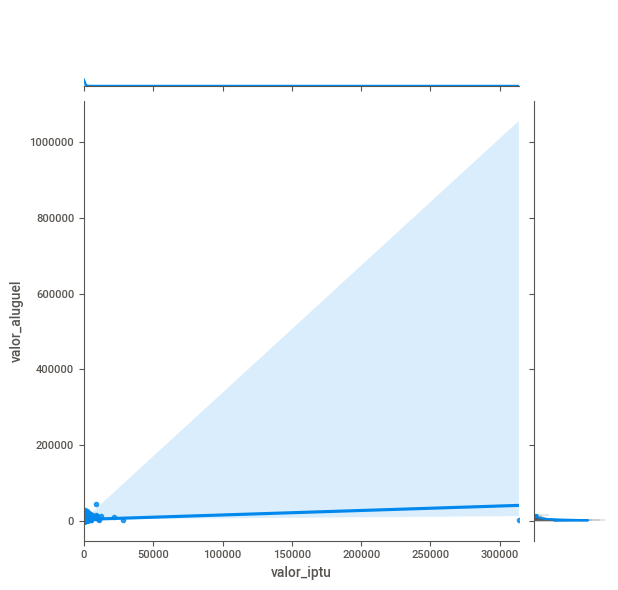

In [32]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder**
- **One Hot Enconder**

Verificando a quantidade de valores únicos na coluna estado

In [33]:
data.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

Verificando a quantidade de valores únicos na coluna cidade

In [34]:
data.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio De Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [35]:
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [36]:
data.head()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio,animal_categorical,mobilia_categorical,estado__MG,estado__RJ,estado__RS,estado__SP,cidade__Belo Horizonte,cidade__Campinas,cidade__Porto Alegre,cidade__Rio De Janeiro,cidade__São Paulo
0,70,2,1,1,7,1,1,3300,2065,211,42,aceita,mobiliado,0,0,0,1,0,0,0,0,1
1,320,4,4,0,20,1,0,4960,1200,1750,63,aceita,nao_mobiliado,0,0,0,1,0,0,0,0,1
2,80,1,1,1,6,1,0,2800,1000,0,41,aceita,nao_mobiliado,0,0,1,0,0,0,1,0,0
3,51,2,1,0,2,1,0,1112,270,22,17,aceita,nao_mobiliado,0,0,1,0,0,0,1,0,0
4,25,1,1,0,1,0,0,800,0,25,11,nao_aceita,nao_mobiliado,0,0,0,1,0,0,0,0,1


In [37]:
data.columns

Index(['area', 'num_quartos', 'num_banheiros', 'garagem', 'num_andares',
       'aceita_animais', 'mobilia', 'valor_aluguel', 'valor_condominio',
       'valor_iptu', 'valor_seguro_incendio', 'animal_categorical',
       'mobilia_categorical', 'estado__MG', 'estado__RJ', 'estado__RS',
       'estado__SP', 'cidade__Belo Horizonte', 'cidade__Campinas',
       'cidade__Porto Alegre', 'cidade__Rio De Janeiro', 'cidade__São Paulo'],
      dtype='object')

# Detecção de Outliers, Machine Learning

Excluindo os atributos categoricos

In [38]:
data.drop(["animal_categorical","mobilia_categorical"], axis=1, inplace=True)

Outlier Detection

Verificando os registros anomalos no atributo valor_aluguel

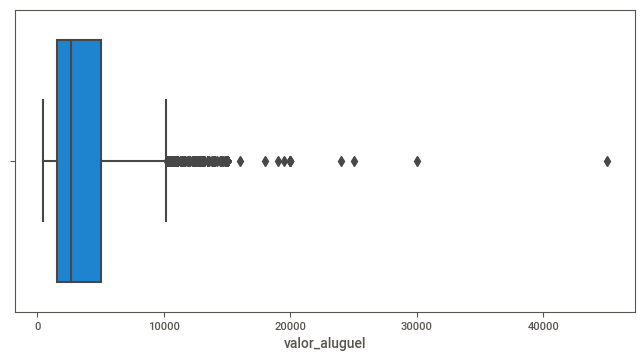

In [39]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['valor_aluguel'])
plt.show()

Quantil 1 = 25% dos dados.

In [40]:
Q1 = data["valor_aluguel"].quantile(.25)

Quantil 3 = 75% dos dados.

In [41]:
Q3 = data["valor_aluguel"].quantile(.75)

In [42]:
Q1,Q3

(1530.0, 5000.0)

Faixa de Intervalo Interqualítico

In [43]:
IQR = Q3 - Q1

In [44]:
IQR

3470.0

Calculando os limites

In [45]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [46]:
lower,upper

(-3675.0, 10205.0)

Definindo a seleção dos registros

In [47]:
data_clean = data[data['valor_aluguel'] >= lower] 

In [48]:
data_clean = data_clean[data_clean['valor_aluguel'] <= upper]

In [49]:
data_clean.describe()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio,estado__MG,estado__RJ,estado__RS,estado__SP,cidade__Belo Horizonte,cidade__Campinas,cidade__Porto Alegre,cidade__Rio De Janeiro,cidade__São Paulo
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9.977000e+03,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,134.480204,2.415957,2.092413,1.466573,5.243460,0.774882,0.235341,3221.233337,1.068422e+03,301.399218,43.940664,0.117570,0.144833,0.117169,0.620427,0.117570,0.083993,0.117169,0.144833,0.536434
std,550.667527,1.122319,1.289368,1.471634,5.842044,0.417681,0.424233,2296.025341,1.585605e+04,3190.804271,32.114269,0.322115,0.351950,0.321638,0.485305,0.322115,0.277391,0.321638,0.351950,0.498696
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,450.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1500.000000,1.910000e+02,34.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2500.000000,5.500000e+02,110.000000,33.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,4250.000000,1.119000e+03,307.000000,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,10.000000,10.000000,12.000000,301.000000,1.000000,1.000000,10200.000000,1.117000e+06,313700.000000,178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


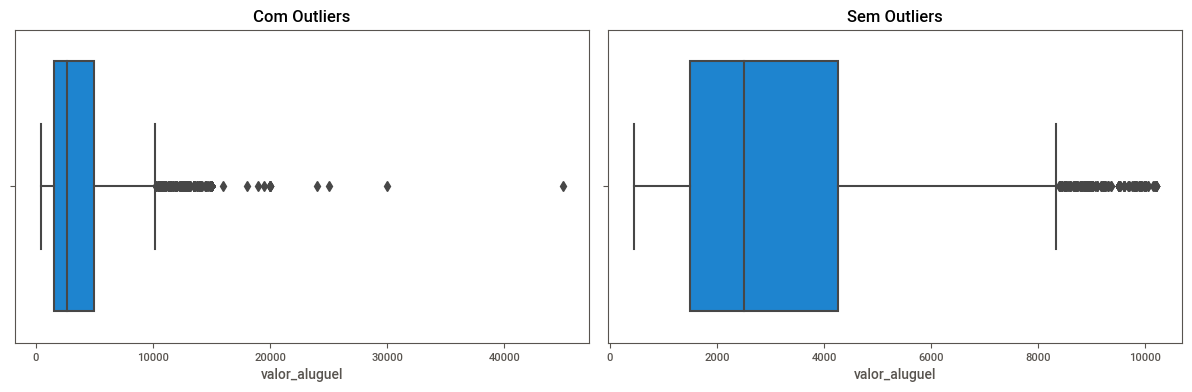

In [50]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Com Outliers')
sns.boxplot(x= data['valor_aluguel'])

plt.subplot(1, 2, 2)
plt.title('Sem Outliers')
sns.boxplot(x= data_clean['valor_aluguel'])

plt.tight_layout(pad=1.0)
plt.show()

In [51]:
data_clean.describe()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio,estado__MG,estado__RJ,estado__RS,estado__SP,cidade__Belo Horizonte,cidade__Campinas,cidade__Porto Alegre,cidade__Rio De Janeiro,cidade__São Paulo
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9.977000e+03,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,134.480204,2.415957,2.092413,1.466573,5.243460,0.774882,0.235341,3221.233337,1.068422e+03,301.399218,43.940664,0.117570,0.144833,0.117169,0.620427,0.117570,0.083993,0.117169,0.144833,0.536434
std,550.667527,1.122319,1.289368,1.471634,5.842044,0.417681,0.424233,2296.025341,1.585605e+04,3190.804271,32.114269,0.322115,0.351950,0.321638,0.485305,0.322115,0.277391,0.321638,0.351950,0.498696
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,450.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1500.000000,1.910000e+02,34.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2500.000000,5.500000e+02,110.000000,33.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,4250.000000,1.119000e+03,307.000000,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,10.000000,10.000000,12.000000,301.000000,1.000000,1.000000,10200.000000,1.117000e+06,313700.000000,178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Unificando os dataframes

In [52]:
data = data_clean

# Machine Learning

Separando os dados em features e classes.

In [53]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis =1)

Separando os conjuntos de treino e teste.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [57]:
acc=[]

**Calculando a nossa Baseline**

In [58]:
from sklearn.dummy import DummyRegressor

In [59]:
model = DummyRegressor(strategy="median")

Iniciando o treinamento.

In [60]:
model.fit(X_train,y_train)

DummyRegressor(strategy='median')

Fazendo as predições

In [61]:
preds = model.predict(X_test)

Calculando as métricas.

In [62]:
calcula_metricas(y_test,preds)

MAE: 1725.571142284569
RMSE: 2412.108632319079
R2: -0.10403433232124515


Armazendo o resultado.

In [63]:
acc.append(
            [
              'BAS', r2_score(y_test,preds)
            ]
          )

In [64]:
acc

[['BAS', -0.10403433232124515]]

#### Treinando um modelo de Regressão Linear

Instanciando o estimator.

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

Iniciando o treinamento.

In [67]:
model.fit(X_train,y_train)

LinearRegression()

Fazendo as predições

In [68]:
preds = model.predict(X_test)

Calculando as métricas.

In [69]:
calcula_metricas(y_test,preds)

MAE: 238.00270897829492
RMSE: 360.6166710375984
R2: 0.9753236766169348


Armazendo o resultado.

In [70]:
acc.append(
            [
              'LIR', r2_score(y_test,preds)
            ]
          )

In [71]:
acc

[['BAS', -0.10403433232124515], ['LIR', 0.9753236766169348]]

Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

Iniciando o treinamento.

In [73]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

Fazendo as predições

In [74]:
preds = model.predict(X_test)

Calculando as métricas.

In [75]:
calcula_metricas(y_test,preds)

MAE: 76.99665998663994
RMSE: 292.531161235724
R2: 0.9837619780772514


Armazendo o resultado.

In [76]:
acc.append(['DTR',r2_score(y_test,preds)])

In [77]:
acc

[['BAS', -0.10403433232124515],
 ['LIR', 0.9753236766169348],
 ['DTR', 0.9837619780772514]]

Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

Iniciando o treinamento.

In [79]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

Fazendo as predições

In [80]:
preds = model.predict(X_test)

Calculando as métricas.

In [81]:
calcula_metricas(y_test,preds)

MAE: 66.99629373031777
RMSE: 213.78859399001124
R2: 0.9913272282794932


Armazendo o resultado.

In [82]:
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

In [83]:
acc

[['BAS', -0.10403433232124515],
 ['LIR', 0.9753236766169348],
 ['DTR', 0.9837619780772514],
 ['RFN', 0.9913272282794932]]

KNN Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

Iniciando o treinamento.

In [85]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

Fazendo as predições

In [86]:
preds = model.predict(X_test)

Calculando as métricas.

In [87]:
calcula_metricas(y_test,preds)

MAE: 686.756446225785
RMSE: 1084.466638032114
R2: 0.7768374859104448


Armazendo o resultado.

In [88]:
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

In [89]:
acc

[['BAS', -0.10403433232124515],
 ['LIR', 0.9753236766169348],
 ['DTR', 0.9837619780772514],
 ['RFN', 0.9913272282794932],
 ['KNNR', 0.7768374859104448]]

Ordenando os resultados.

In [90]:
acc.sort(key = lambda y:y[1],reverse =True)

In [91]:
acc

[['RFN', 0.9913272282794932],
 ['DTR', 0.9837619780772514],
 ['LIR', 0.9753236766169348],
 ['KNNR', 0.7768374859104448],
 ['BAS', -0.10403433232124515]]

## Pycaret

In [171]:
!pip install pycaret

     |████████████████████████████████| 266kB 7.7MB/s 
     |████████████████████████████████| 25.9MB 120kB/s 
     |████████████████████████████████| 174kB 50.3MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 14.8MB 216kB/s 
     |████████████████████████████████| 6.8MB 40.8MB/s 
     |████████████████████████████████| 1.4MB 32.8MB/s 
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalli

In [92]:
from pycaret.regression import *

In [93]:
numeric_features = ['num_quartos', 'num_banheiros', 'garagem', 'num_andares', 'aceita_animais','mobilia']

In [94]:
s = setup(data
          ,target = 'valor_aluguel'
          ,numeric_features = [ 'num_quartos'
                               ,'num_banheiros'
                               ,'garagem'
                               ,'num_andares'
                               ,'aceita_animais'
                               ,'mobilia']
          ,log_experiment = True
          ,experiment_name = 'exp-bootcamp'
         )

,Description,Value
0,session_id,5360
1,Target,valor_aluguel
2,Original Data,"(9977, 20)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6983, 16)"


Vamos comparar os modelos

In [95]:
best = compare_models(fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,82.5804,4.176588e+04,203.8299,0.9920,0.0863,0.0366,0.206
catboost,CatBoost Regressor,77.0962,4.162315e+04,203.3121,0.9920,0.0865,0.0349,2.666
et,Extra Trees Regressor,69.4156,4.310528e+04,206.8948,0.9917,0.0860,0.0305,1.326
xgboost,Extreme Gradient Boosting,84.4587,4.617673e+04,214.0921,0.9911,0.0916,0.0377,7.556
gbr,Gradient Boosting Regressor,99.4759,4.663283e+04,215.3604,0.9910,0.0946,0.0445,0.550
rf,Random Forest Regressor,72.7290,4.968238e+04,222.3551,0.9905,0.0900,0.0316,1.850
dt,Decision Tree Regressor,78.2185,9.025349e+04,299.9590,0.9827,0.1148,0.0345,0.040
llar,Lasso Least Angle Regression,260.0969,1.554706e+05,393.9450,0.9701,0.1348,0.0925,0.018
omp,Orthogonal Matching Pursuit,271.2651,1.718288e+05,414.3561,0.9669,0.1386,0.0879,0.018
lr,Linear Regression,239.0679,2.212346e+05,442.4266,0.9575,0.1387,0.0871,0.510


Listando os modelos

In [96]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Selecionando o melhor algoritmo

In [97]:
catboost = create_model('catboost', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,79.3338,44490.2327,210.9271,0.9922,0.0918,0.0370
1,72.6707,31912.5360,178.6408,0.9934,0.0798,0.0333
2,74.7281,35275.6522,187.8181,0.9932,0.0763,0.0337
3,80.2819,48350.3219,219.8871,0.9905,0.0873,0.0363
4,78.4665,48086.9945,219.2875,0.9908,0.0975,0.0342
Mean,77.0962,41623.1475,203.3121,0.9920,0.0865,0.0349
SD,2.9061,6780.0154,16.9509,0.0012,0.0077,0.0015


In [98]:
print(catboost)

Otimizando o modelo

In [99]:
tuned_catboost = tune_model(catboost,fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,94.4513,44540.1851,211.0455,0.9922,0.0909,0.0421
1,90.2565,33428.8481,182.8356,0.9931,0.0816,0.0406
2,88.8257,38354.6751,195.8435,0.9926,0.0789,0.0393
3,98.3247,50897.7602,225.6053,0.9900,0.0889,0.0422
4,92.8986,48903.8964,221.1423,0.9906,0.0951,0.0387
Mean,92.9514,43225.0730,207.2944,0.9917,0.0871,0.0406
SD,3.3289,6519.7467,15.9404,0.0012,0.0060,0.0014


Visualizando os residuais

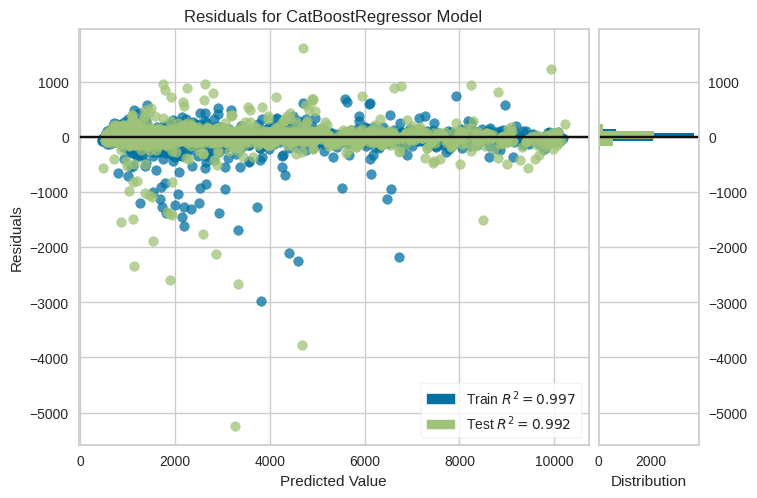

In [100]:
plot_model(catboost)

Visualizando o erro do modelo

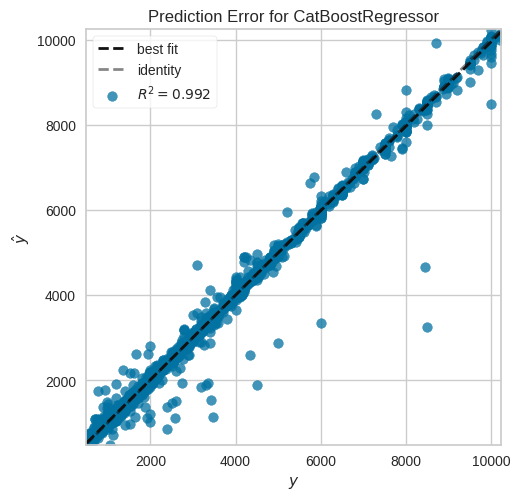

In [101]:
plot_model(catboost, plot = 'error')

Visualizando as features importantes

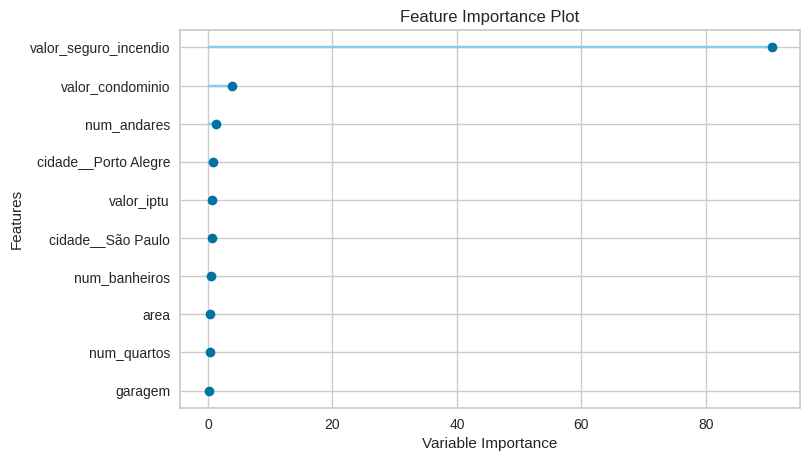

In [102]:
plot_model(catboost, plot='feature')

Finaliza o modelo

In [103]:
final_catboost = finalize_model(catboost)

Salva o modelo

In [104]:
save_model(final_catboost,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['num_quartos',
                                                           'num_banheiros',
                                                           'garagem',
                                                           'num_andares',
                                                           'aceita_animais',
                                                           'mobilia'],
                                       target='valor_aluguel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy=...
                 ('cluster_all', 'passthrough'),
                 ('dummy', 

In [105]:
!ls

catboost_info  mlruns		 sample_data
logs.log       modelo-final.pkl  SWEETVIZ_REPORT.html


In [106]:
!mlflow ui

[2021-06-20 21:05:09 +0000] [1545] [INFO] Starting gunicorn 20.1.0
[2021-06-20 21:05:09 +0000] [1545] [INFO] Listening at: http://127.0.0.1:5000 (1545)
[2021-06-20 21:05:09 +0000] [1545] [INFO] Using worker: sync
[2021-06-20 21:05:09 +0000] [1548] [INFO] Booting worker with pid: 1548
[2021-06-20 21:06:31 +0000] [1545] [INFO] Handling signal: int

Aborted!
[2021-06-20 21:06:31 +0000] [1548] [INFO] Worker exiting (pid: 1548)
[2021-06-20 21:06:31 +0000] [1545] [INFO] Shutting down: Master
